Idea: get points of European Countries and compute the centroids. Check if France has the same centroid with overseas or not ;)

In [28]:
import geopandas as gpd
import pandas as pd
import shapely

In [29]:
df = gpd.read_file("data/ne_10m_admin_0_countries.shp",
    include_fields=["NAME", "CONTINENT", "geometry"])

In [30]:
df_eu = df["CONTINENT"] == "Europe" # creates a boolean "map"
df_eu = df[df_eu] # filters the dataframe using the boolean map
tr = df[df["NAME"] == "Turkey"] # adding Turkey
df_eu = pd.concat([df_eu, tr]) # concatenating the dataframes

<AxesSubplot:>

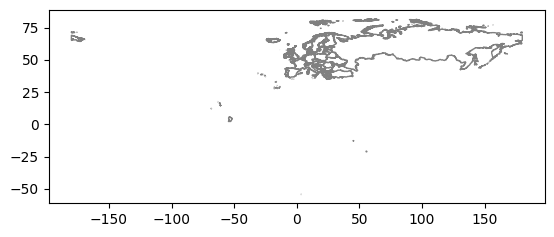

In [31]:
df_eu.plot(color="white", edgecolor="gray")

looks good to me

In [32]:
centroids = [i[1].centroid for i in df_eu["geometry"].items()]
cdf = gpd.GeoDataFrame(centroids, columns=["geometry"])

In [33]:
type(cdf)

geopandas.geodataframe.GeoDataFrame

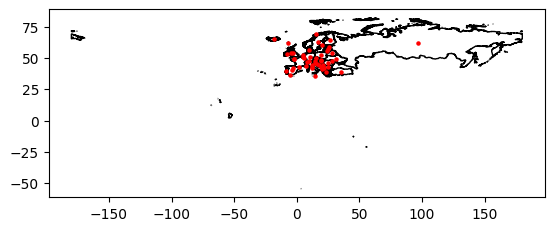

In [34]:
base = df_eu.plot(color='white', edgecolor='black')
cdf.plot(ax=base, marker='o', color='red', markersize=5);

In [35]:
fr = df[df["NAME"] == "France"]
fr = gpd.GeoDataFrame(fr, columns=["geometry"])
fcntr = fr["geometry"].centroid
fcntr

C:\Users\Dinga\AppData\Local\Temp\ipykernel_10832\2870716524.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  fcntr = fr["geometry"].centroid


21    POINT (-2.75522 42.18011)
dtype: geometry

<AxesSubplot:>

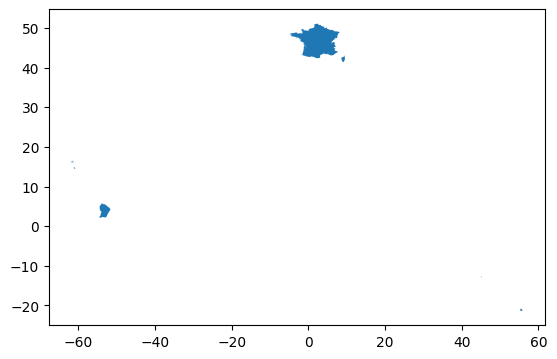

In [36]:
fr.plot()

In [73]:
from keplergl import KeplerGl

In [74]:
map = KeplerGl()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [75]:
df = gpd.read_file("data/ne_10m_admin_0_countries.shp",
    include_fields=["NAME", "CONTINENT", "geometry"])

In [76]:
df_eu = df["CONTINENT"] == "Europe" # creates a boolean "map"
df_eu = df[df_eu] # filters the dataframe using the boolean map
tr = df[df["NAME"] == "Turkey"] # adding Turkey
df_eu = pd.concat([df_eu, tr]) # concatenating the dataframes

In [77]:
map.add_data(data=df_eu, name="Countries")

In [78]:
map

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeplerGl(data={'Countries': {'index': [21, 33, 34, 43, 47, 48, 49, 50, 51, 52, 53, 54, 57, 59, 61, 62, 64, 66,…